# Sales data exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2=pd.read_excel(io='sales_rep.xlsx',sheet_name='Sales_rep',)


In [3]:
df=pd.read_excel(io='sales_rep.xlsx',sheet_name='sales_data_sample')

In [4]:
df.iloc[:,1:].head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium
1,10309,41,100.00,5,4394.38,10/15/2004 0:00,Shipped,Motorcycles,95,S10_1678,Baane Mini Imports,Stavern,4110,Norway,Medium
2,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium
3,10174,34,100.00,4,8014.82,2003-06-11 00:00:00,Shipped,Classic Cars,214,S10_1949,"Australian Gift Network, Co",South Brisbane,4101,Australia,Large
4,10194,42,100.00,11,7290.36,11/25/2003 0:00,Shipped,Classic Cars,214,S10_1949,"Saveley & Henriot, Co.",Lyon,69004,France,Large


In [5]:
df=df.iloc[:,1:].merge(df2.iloc[:,:2],left_on='ORDERLINENUMBER',right_on='SALES_REP_ID')

In [6]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni


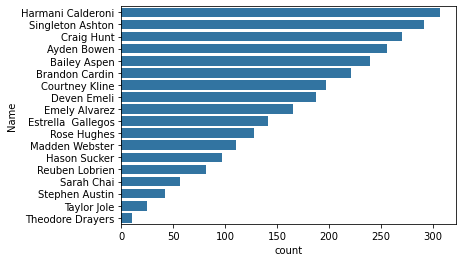

In [7]:
b_color=sns.color_palette()[0]
y_order=df.Name.value_counts(ascending=False)
sns.countplot(data=df,y='Name',color=b_color,order=y_order.index);

> Harmani Calderoni was able to pull about 300 (10.9%) customers within the period given in the data

>Theodore Drayers Pulled the least number of customers, 10 (0.4%)

> However, this visualization does not indicate which sales rep generated the most or the least revenue through out the period given in the data

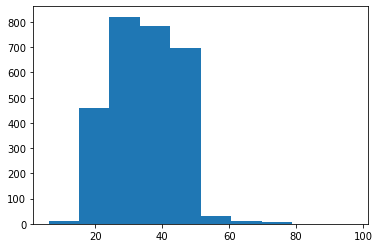

In [8]:
plt.hist(data=df,x='QUANTITYORDERED');

In [9]:
df.QUANTITYORDERED.describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [10]:
bins=np.arange(2,df.QUANTITYORDERED.max()+2,2)

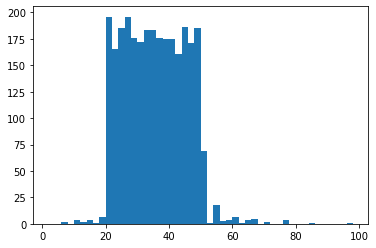

In [11]:
plt.hist(data=df,x='QUANTITYORDERED',bins=bins);

Uniformity: Non-uniform
Mode:multi-modal,tri-modal
Adjacency of the bars:takes on continuous range of values between 6 and 100
Overall, a generally multi-imodal distribution is observed (one with three peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values.

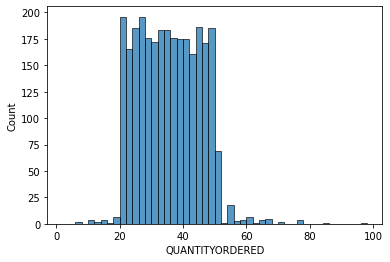

In [12]:
sns.histplot(df['QUANTITYORDERED'],bins=bins);

> Orders made by customers range between 6 and 97

> There is a high proportion of orders between 20 and 50 placed by the customers

> Majority of customers made 20-50 orders within the period given in the data 

> Very few customers placed orders less than 20 times

> Fewer customers place orders more than 50 times


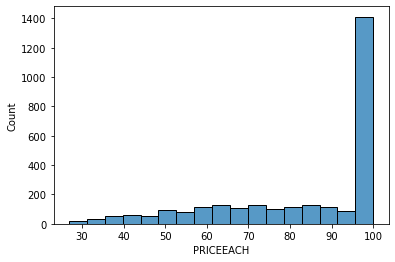

In [13]:
sns.histplot(df['PRICEEACH']);

> Non-uniform, uni-modal distribution


In [14]:
df['PRICEEACH'].describe()

count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64

In [15]:
price_bins=np.arange(26 ,df.PRICEEACH.max()+2,2)

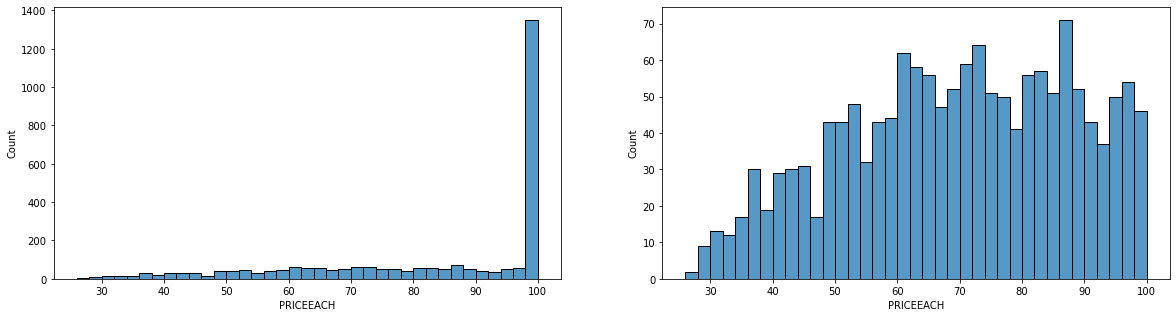

In [16]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.histplot(df['PRICEEACH'],bins=price_bins);

plt.subplot(1,2,2)
sns.histplot(df[df['PRICEEACH']<100]['PRICEEACH'],bins=price_bins);

> The price of each product ranges between 26 and 100

>Products with tag price $100 were the most sold (about 1300 times) throughout

> Products with prices below $100 were sold less than 70 times



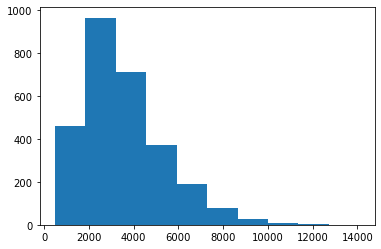

In [17]:
plt.hist(data=df, x='SALES');

> Non-uniform, unimodal distribution  with right tail (skewed to the right)


In [18]:
np.log10(df['SALES']).describe()

count    2823.000000
mean        3.493977
std         0.226408
min         2.683164
25%         3.343099
50%         3.503082
75%         3.653984
max         4.148689
Name: SALES, dtype: float64

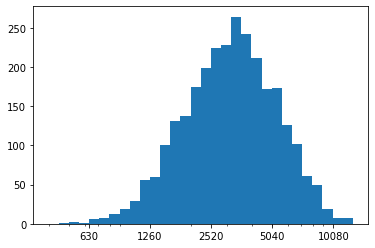

In [19]:
sales_bins=10**np.arange(2.6,4.1+0.05,0.05)
plt.hist(data=df, x='SALES',bins=sales_bins)
plt.xscale('log')

ticks=[630,1260,2520,5040,10080]
labels=['{}'.format(x) for x in ticks]

plt.xticks(ticks,labels)
plt.show()

> Sales' distribution ranges between $482-14082

> The mode of the distribution is around $3000

>The distribution is slightly skewed to the left 


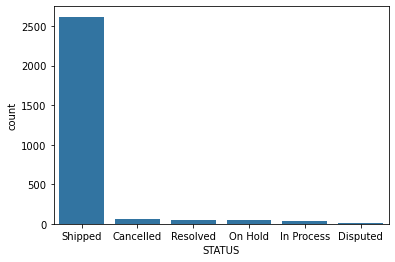

In [20]:
sns.countplot(data=df,x='STATUS',color=b_color,order=df.STATUS.value_counts().index);

> more than 2500 orders (92.7%) were shipped

> About 2.1% orders couldn't be resolved, they were cancelled

> Minimal disputed orders (0.5%)

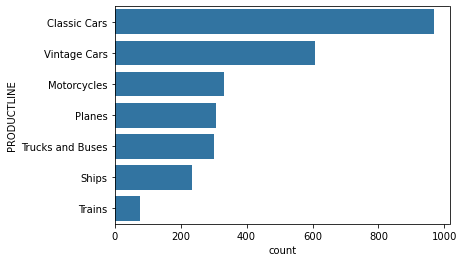

In [21]:
sns.countplot(data=df,y='PRODUCTLINE',color=b_color,order=df.PRODUCTLINE.value_counts().index);

> Classics cars were ordered the most, representing about 34% of the company's product line

> The least product line ordered throughout were trains

> The number of times Plains were ordered is equal to the number of times ships and trains were ordered combined

In [22]:
# top 10 customers according to number of transactions made
pd.DataFrame(df.CUSTOMERNAME.value_counts()).head(10)

,CUSTOMERNAME
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Muscle Machine Inc,48
Rovelli Gifts,48
"Anna's Decorations, Ltd",46
Souveniers And Things Co.,46


In [23]:
# least performing customers according to number of transactions made
pd.DataFrame(df.CUSTOMERNAME.value_counts()).tail(10)

,CUSTOMERNAME
"Men 'R' US Retailers, Ltd.",14
CAF Imports,13
West Coast Collectables Co.,13
"Double Decker Gift Stores, Ltd",12
Cambridge Collectables Co.,11
Microscale Inc.,10
Royale Belge,8
Auto-Moto Classics Inc.,8
Atelier graphique,7
Boards & Toys Co.,3


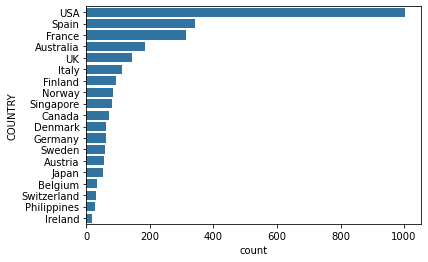

In [24]:
sns.countplot(data=df,y='COUNTRY',color=b_color,order=df.COUNTRY.value_counts().index);

> Most transactions were from US customers (35.6%)

> The least transactions were from Ireland

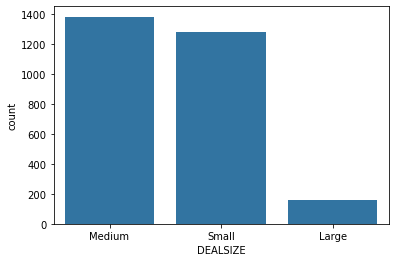

In [25]:
sns.countplot(data=df,x='DEALSIZE',color=b_color,order=df.DEALSIZE.value_counts().index);

> Three unique deal sizes were represented in the data

> Of the deal sizes, the Large deal size were the least considering number of transactions

In [26]:
df.MSRP.describe()

count    2823.000000
mean      100.715551
std        40.187912
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64

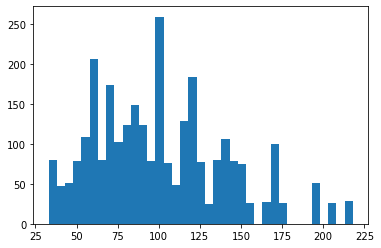

In [27]:
ms_bin=np.arange(33,214+5,5)
plt.hist(data=df, x='MSRP',bins=ms_bin);

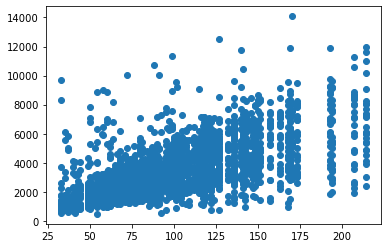

In [28]:
plt.scatter(data=df,x='MSRP',y='SALES')
plt.show()

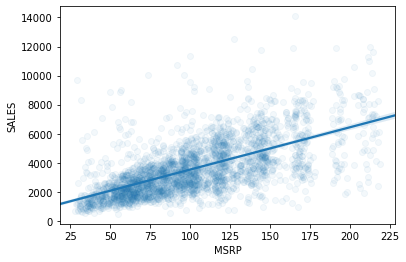

In [29]:
sns.regplot(data = df, x = 'MSRP', y = 'SALES', truncate=False, x_jitter=5,scatter_kws={'alpha':1/20});

In [30]:
x=df[['SALES']].groupby(df['ORDERDATE']).median()

In [31]:
table = pd.pivot_table(df, values='SALES', index=['ORDERDATE'],
                     aggfunc=np.sum)

In [32]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

In [33]:
x=df[['ORDERDATE','SALES']]
x=x.copy()

In [34]:
x['year']=x['ORDERDATE'].dt.year
x['month']=x['ORDERDATE'].dt.month_name()

In [35]:
x

,ORDERDATE,SALES,year,month
0,2004-02-20,3965.66,2004,February
1,2004-02-11,4358.04,2004,February
2,2004-12-01,6123.40,2004,December
3,2005-09-02,5182.00,2005,September
4,2005-05-17,5202.94,2005,May
...,...,...,...,...
2818,2003-10-28,1971.54,2003,October
2819,2003-10-10,2162.16,2003,October
2820,2004-02-19,2280.24,2004,February
2821,2003-10-22,2204.10,2003,October


In [36]:
table=x['SALES'].groupby(x['year'],).sum()
table2=x['SALES'].groupby(x['month'],).median()

In [37]:
table

year
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

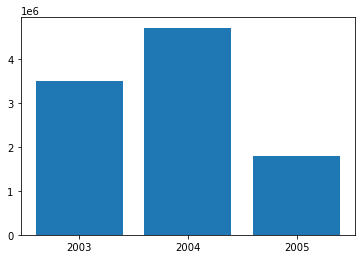

In [38]:
plt.bar(table.index,table.values)
ticks=[2003.0,2004.0,2005.0]
plt.xticks(ticks,['2003','2004','2005'])
plt.show()

## Bivariate Visualization

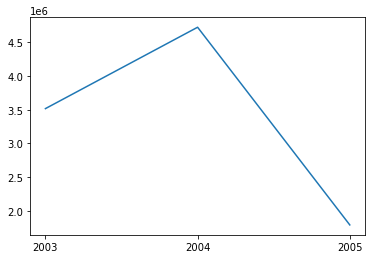

In [39]:
plt.plot(table.index,table.values);
ticks=[2003.0,2004.0,2005.0]
plt.xticks(ticks,['2003','2004','2005'])
plt.show()

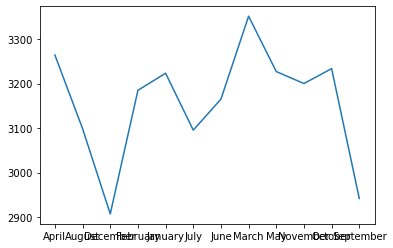

In [40]:

plt.plot(table2.index,table2.values);

plt.show()

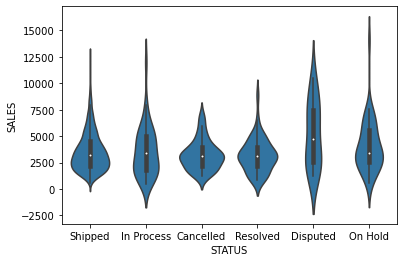

In [41]:
sns.violinplot(data=df, x='STATUS',y='SALES',color=b_color);


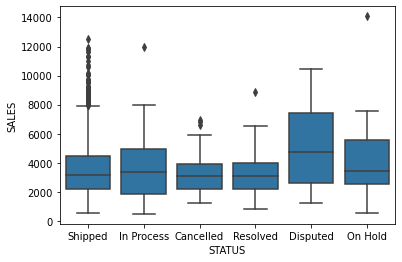

In [42]:
sns.boxplot(data=df, x='STATUS',y='SALES',color=b_color);

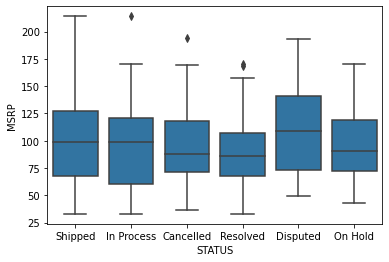

In [43]:
sns.boxplot(data=df, x='STATUS',y='MSRP',color=b_color);

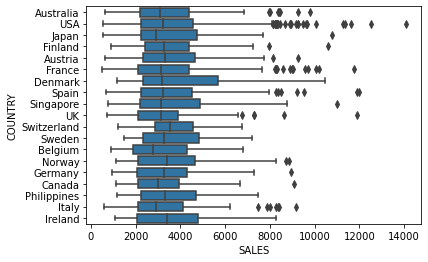

In [44]:
sns.boxplot(data=df, y='COUNTRY',x='SALES',color=b_color);

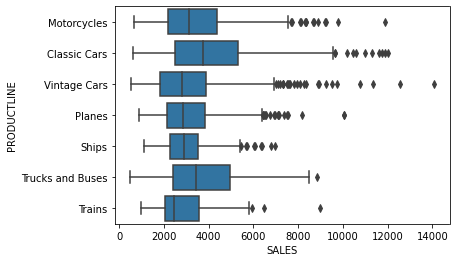

In [45]:
sns.boxplot(data=df, y='PRODUCTLINE',x='SALES',color=b_color);

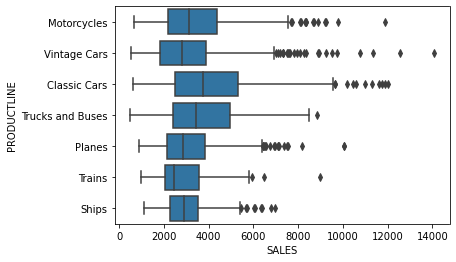

In [46]:
vt=['Motorcycles','Vintage Cars','Classic Cars','Trucks and Buses','Planes','Trains','Ships']
vt_order = pd.api.types.CategoricalDtype(ordered=True, categories=vt)
df['PRODUCTLINE']=df['PRODUCTLINE'].astype(vt_order)
sns.boxplot(data=df, y='PRODUCTLINE',x='SALES',color=b_color);

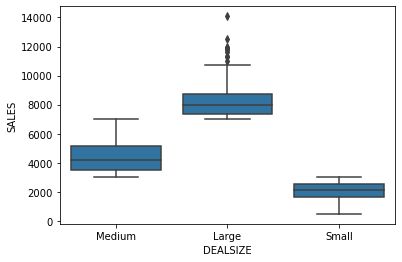

In [48]:
sns.boxplot(data=df, x='DEALSIZE',y='SALES',color=b_color);


In [50]:
v_sizes=['Small','Medium','Large']
v_order = pd.api.types.CategoricalDtype(ordered=True, categories=v_sizes)
df['DEALSIZE']=df['DEALSIZE'].astype(v_order)

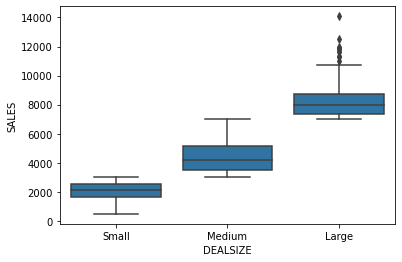

In [51]:
sns.boxplot(data=df, x='DEALSIZE',y='SALES',color=b_color);

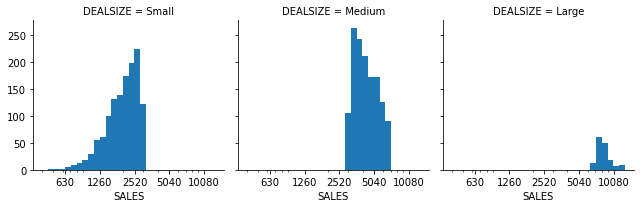

In [58]:
g=sns.FacetGrid(data=df,col='DEALSIZE')
g.map(plt.hist,'SALES',bins=sales_bins);
plt.xscale('log')

ticks=[630,1260,2520,5040,10080]
labels=['{}'.format(x) for x in ticks]

plt.xticks(ticks,labels)
plt.show()

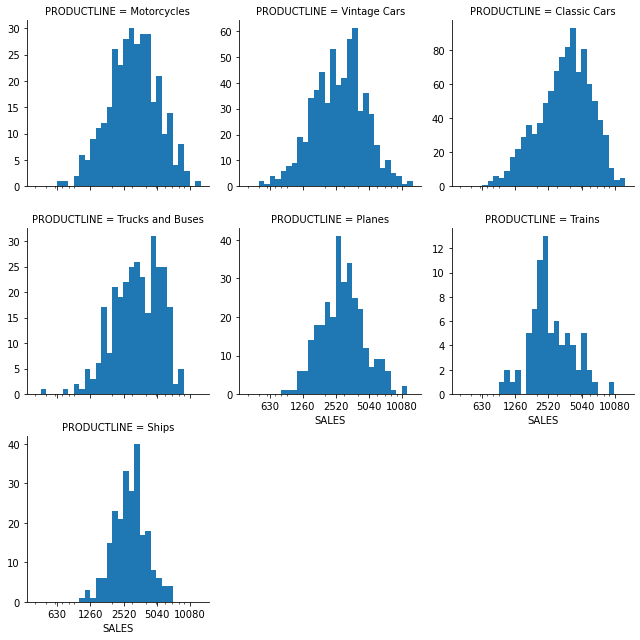

In [70]:
g=sns.FacetGrid(data=df,col='PRODUCTLINE',col_wrap=3, sharey=False)
g.map(plt.hist,'SALES',bins=sales_bins);
plt.xscale('log')

ticks=[630,1260,2520,5040,10080]
labels=['{}'.format(x) for x in ticks]

plt.xticks(ticks,labels)
plt.show()

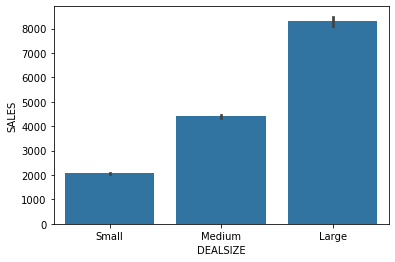

In [73]:
sns.barplot(data=df, x='DEALSIZE',y='SALES',color=b_color)
plt.show()

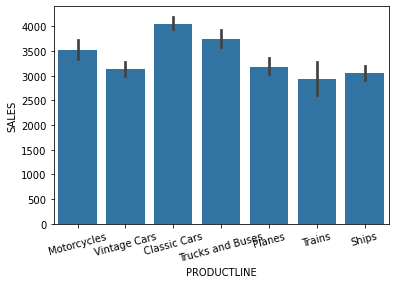

In [76]:
sns.barplot(data=df, x='PRODUCTLINE',y='SALES',color=b_color)
plt.xticks(rotation=15)
plt.show()

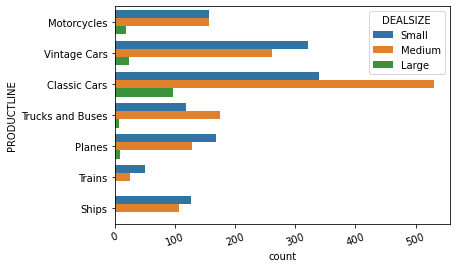

In [86]:
sns.countplot(data=df, hue='DEALSIZE',y='PRODUCTLINE')
plt.xticks(rotation=20)
plt.show()

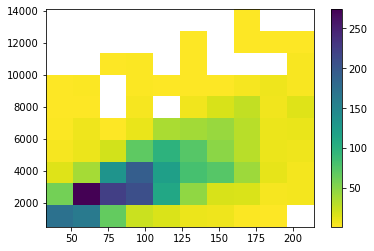

In [99]:
plt.hist2d(data=df,x='MSRP',y='SALES',cmin=.5,cmap='viridis_r')
plt.colorbar()
plt.show()

In [90]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2004-02-20,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni
2,10210,34,100.00,1,6123.40,2004-12-01,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
3,10377,50,100.00,1,5182.00,2005-09-02,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,1,Harmani Calderoni
4,10419,37,100.00,1,5202.94,2005-05-17,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,1,Harmani Calderoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10168,27,73.02,18,1971.54,2003-10-28,Shipped,Planes,68,S24_3949,Technics Stores Inc.,Burlingame,94217,USA,Small,18,Theodore Drayers
2819,10159,42,51.48,18,2162.16,2003-10-10,Shipped,Motorcycles,60,S18_2625,Corporate Gift Ideas Co.,San Francisco,NaN,USA,Small,18,Theodore Drayers
2820,10222,36,63.34,18,2280.24,2004-02-19,Shipped,Ships,54,S72_3212,Collectable Mini Designs Co.,San Diego,91217,USA,Small,18,Theodore Drayers
2821,10165,31,71.10,18,2204.10,2003-10-22,Shipped,Trucks and Buses,60,S18_2432,"Dragon Souveniers, Ltd.",Singapore,79903,Singapore,Small,18,Theodore Drayers


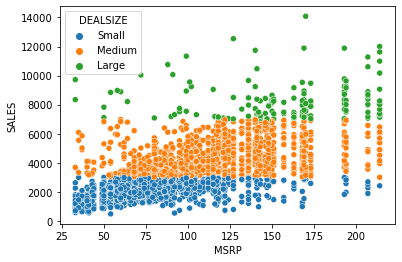

In [105]:
sns.scatterplot(data=df,x='MSRP',y='SALES',hue='DEALSIZE',x_jitter=0.3)
plt.show()

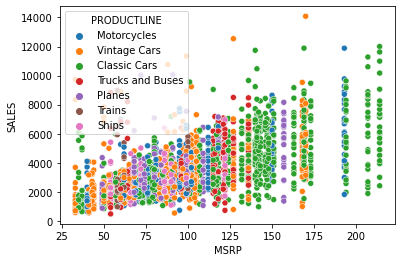

In [104]:
sns.scatterplot(data=df,x='MSRP',y='SALES',hue='PRODUCTLINE')
plt.show()

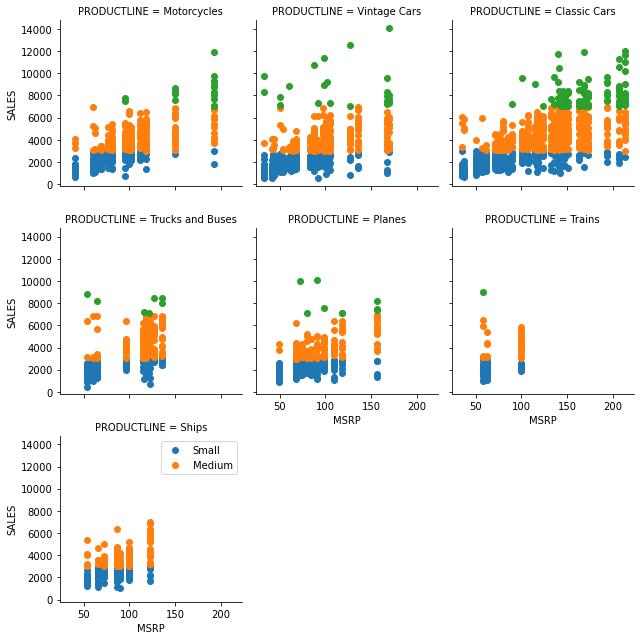

In [109]:
g=sns.FacetGrid(data=df,col='PRODUCTLINE',hue='DEALSIZE',col_wrap=3)
g.map(plt.scatter,'MSRP','SALES')
plt.legend()
plt.show()

C:\Users\Oluwasola\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


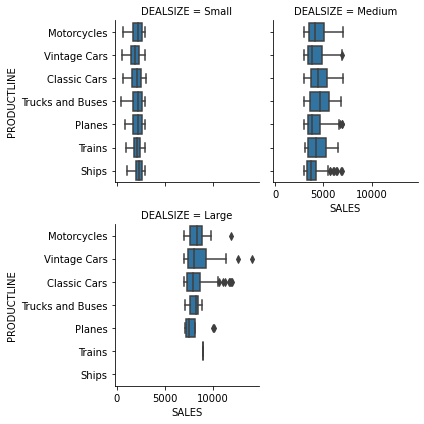

In [124]:

g=sns.FacetGrid(data=df,col='DEALSIZE',col_wrap=2)
g.map(sns.boxplot,'SALES','PRODUCTLINE')

plt.show()

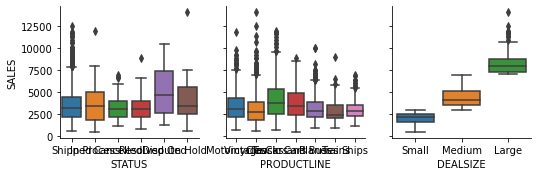

In [132]:
g=sns.PairGrid(data=df, x_vars=
[ 'STATUS','PRODUCTLINE','DEALSIZE'],y_vars=['SALES'])
g.map(sns.boxplot)

In [135]:
print(df.shape)
print(df.dtypes)
df.head()

(2823, 17)
ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERLINENUMBER             int64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
PRODUCTLINE              category
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
POSTALCODE                 object
COUNTRY                    object
DEALSIZE                 category
SALES_REP_ID                int64
Name                       object
dtype: object


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2004-02-20,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni
2,10210,34,100.00,1,6123.40,2004-12-01,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
3,10377,50,100.00,1,5182.00,2005-09-02,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,1,Harmani Calderoni
4,10419,37,100.00,1,5202.94,2005-05-17,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,1,Harmani Calderoni


In [136]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MSRP,SALES_REP_ID
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,100.715551,6.466171
std,92.085478,9.741443,20.174277,4.225841,1841.865106,40.187912,4.225841
min,10100.000000,6.000000,26.880000,1.000000,482.130000,33.000000,1.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,68.000000,3.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,99.000000,6.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,124.000000,9.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,214.000000,18.000000
